# Super Data Science Community Project #26
Retail Pulse: Customer Journey Prediction & Marketing Impact Analysis!!!


In [8]:
# load the usual libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

Loading the data and a quick examination of the structure of the dataframe. Automatically parse the 'Date' column as a date; information was seen from the dataset summary

In [9]:
dataset = pd.read_csv(r'.\data\TechCorner_Sales_update.csv', parse_dates=['Date'], dayfirst=True)
dataset.head()

,Cus.ID,Date,Cus. Location,Age,Gender,Mobile Name,Sell Price,Does he/she Come from Facebook Page?,Does he/she Followed Our Page?,Did he/she buy any mobile before?,Did he/she hear of our shop before?
0,1,2024-05-27,Rangamati Sadar,49,F,Galaxy A55 5G 8/128,17073.0,No,Yes,No,Yes
1,2,2024-05-27,Inside Rangamati,44,M,Redmi Note 12 Pro 8/128,15546.0,Yes,No,No,Yes
2,3,2024-05-27,Rangamati Sadar,45,M,R-70 Turbo 5G 6/128,26516.0,Yes,No,No,Yes
3,4,2024-05-27,Rangamati Sadar,46,M,R-70 Turbo 5G 6/128,21927.0,No,No,No,Yes
4,5,2024-05-27,Outside Rangamati,27,F,Vivo T3x 5G 8/128,16718.0,Yes,No,No,Yes


Summarise the structure of the data set and determine if there are any missing values and the type of the data in each column.

In [10]:
# Check the summary of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8871 entries, 0 to 8870
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Cus.ID                                8871 non-null   int64         
 1   Date                                  8871 non-null   datetime64[ns]
 2   Cus. Location                         8871 non-null   object        
 3   Age                                   8871 non-null   int64         
 4   Gender                                8871 non-null   object        
 5   Mobile Name                           8871 non-null   object        
 6   Sell Price                            8871 non-null   float64       
 7   Does he/she Come from Facebook Page?  8871 non-null   object        
 8   Does he/she Followed Our Page?        8871 non-null   object        
 9   Did he/she buy any mobile before?     8871 non-null   object        
 10  

Dataset summary indicates that there are no missing values. The Cus.ID column will be dropped ax it is only a unique identifier and will not contribute to the analysis. Columns with long names are renamed to shortened forms for easier reference in code to follow

In [11]:
# drop the Cus.ID column
dataset.drop(columns=['Cus.ID'], inplace=True)
dataset.rename(columns={
    'Cus. Location': 'Location',
    'Mobile Name' : 'MobileName',
    'Sell Price' : 'SellPrice',
    'Does he/she Come from Facebook Page?' : 'FromFacebook',
    'Does he/she Followed Our Page?': 'FollowedPage',
    'Did he/she buy any mobile before?': 'BoughtBefore',
    'Did he/she hear of our shop before?': 'HeardShopBefore'
    }, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8871 entries, 0 to 8870
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             8871 non-null   datetime64[ns]
 1   Location         8871 non-null   object        
 2   Age              8871 non-null   int64         
 3   Gender           8871 non-null   object        
 4   MobileName       8871 non-null   object        
 5   SellPrice        8871 non-null   float64       
 6   FromFacebook     8871 non-null   object        
 7   FollowedPage     8871 non-null   object        
 8   BoughtBefore     8871 non-null   object        
 9   HeardShopBefore  8871 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 693.2+ KB


# Exploratory Data Analysis

### Examine the distribution of the cutomers by locations

In [12]:
# Cheack on the unique number of locations, important for later analysis
print('Number of locations: ', len(dataset.Location.unique()))
print('Listing of the locations: ', dataset.Location.unique().tolist())

Number of locations:  3
Listing of the locations:  ['Rangamati Sadar', 'Inside Rangamati', 'Outside Rangamati']


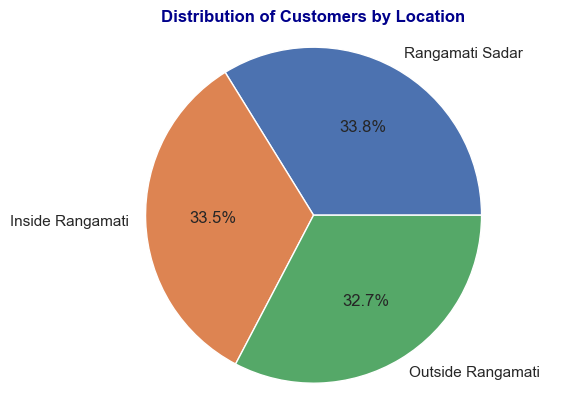

In [13]:
# Distribution Customers by Location
plt.pie(dataset.Location.value_counts(), 
        labels=dataset.Location.unique(), 
        autopct='%1.1f%%', 
       )  # Explode the first slice (for example)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Customers by Location', {'fontweight':'bold', 'c': 'darkblue'})
plt.show()

Customers are equally distributed by location.

### Examine the demographic distribution of the customers

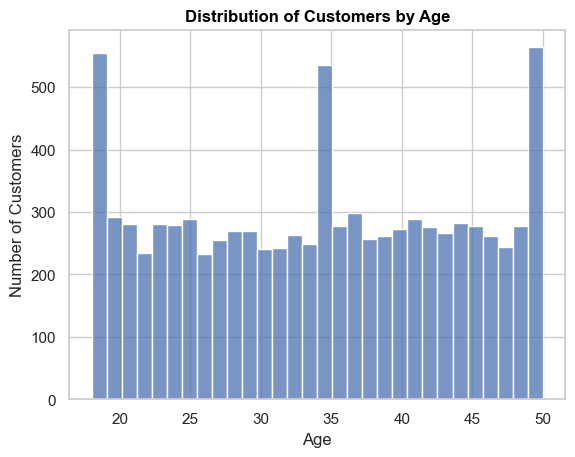

In [14]:
sns.histplot(dataset, x='Age', bins=30, stat='count')
plt.title('Distribution of Customers by Age', {'fontweight':'bold', 'c': 'black'})
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

A Bar plot shows that there are three distinct groups age groups of buyers 19yo, 35yo and 50yo who have made the most purchases. On average, the number of customers in all other age groups remain relatively consistent. Other summary statistics on the age follows:

In [15]:
import statistics as stats
# Check the mean, median and mode of the Age column
print('Mean of Age: ', dataset.Age.mean())
print('Median of Age: ', dataset.Age.median())
print('Mode of Age: ', stats.mode(dataset.Age))
# check the standard deviation of the Age column
print('Standard deviation of Age: ', dataset.Age.std())
# check the minimum and maximum of the Age column
print('Minimum of Age: ', dataset.Age.min())
print('Maximum of Age: ', dataset.Age.max())

Mean of Age:  34.04700710179236
Median of Age:  34.0
Mode of Age:  49
Standard deviation of Age:  9.592611528969623
Minimum of Age:  18
Maximum of Age:  50


### Social media Responses of Customers

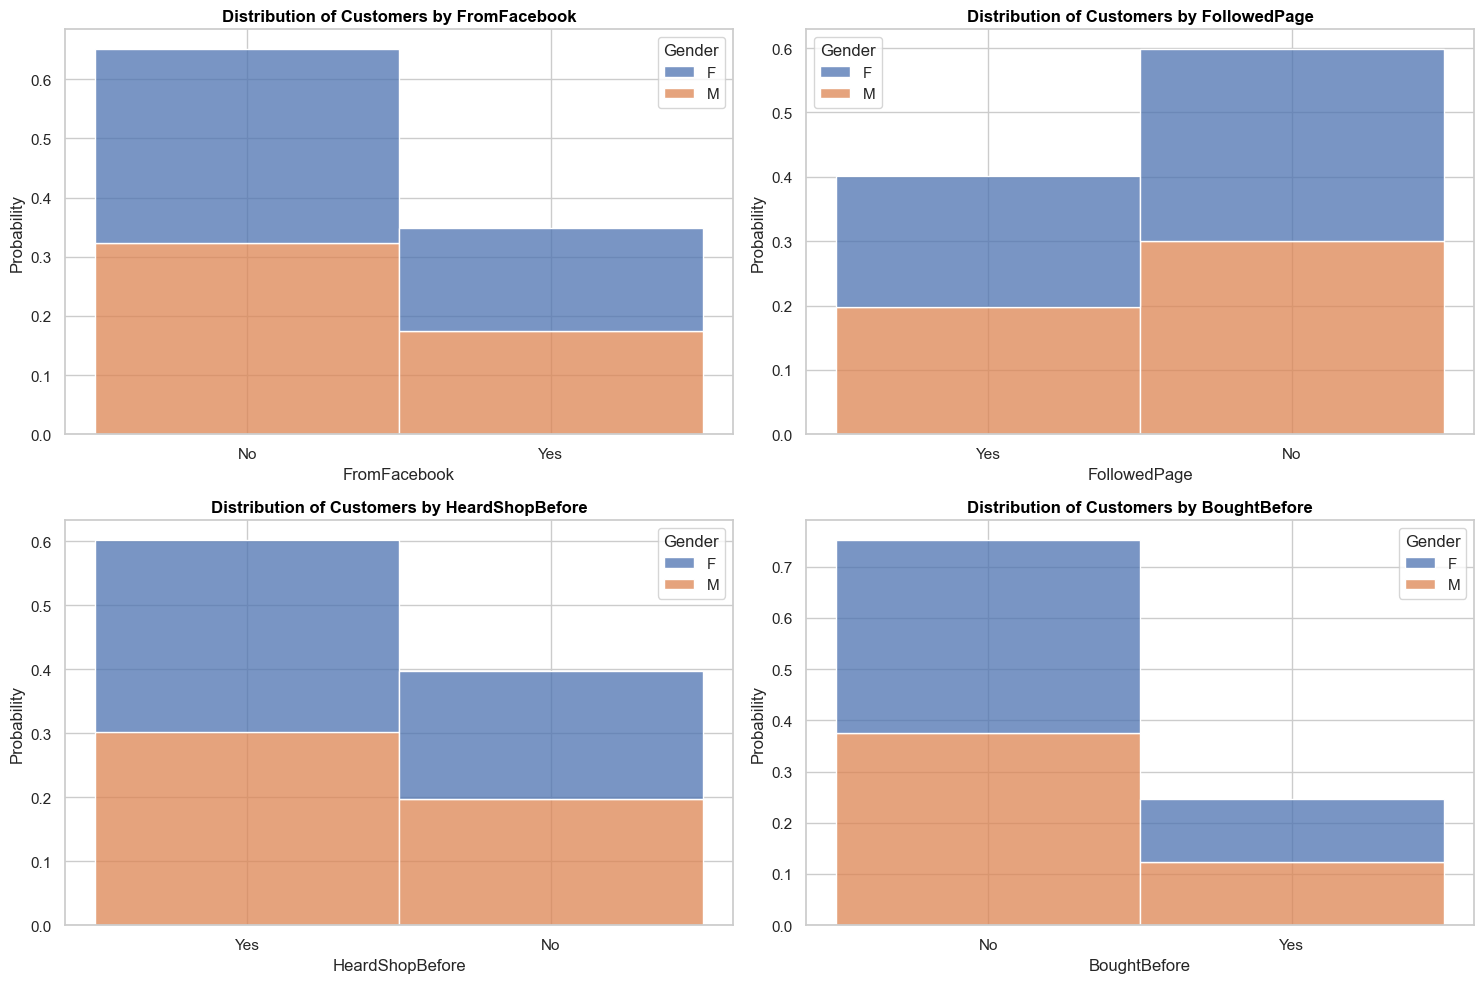

In [16]:
social_media_responses = ['FromFacebook', 'FollowedPage', 'HeardShopBefore', 'BoughtBefore']
plt.figure(figsize=(15,10))
for i , responses in enumerate(social_media_responses, 1):
    plt.subplot(2, 2, i)
    sns.histplot(dataset, x=responses, bins=30, stat='probability', hue='Gender', multiple='stack')
    plt.title(f'Distribution of Customers by {responses}', {'fontweight':'bold', 'c': 'black'})
    plt.xlabel(responses)
    plt.ylabel('Probability')
plt.tight_layout()
plt.show()

The data shows an even distribution of male and female respondents with both genders accounting for approximately 50 percent (50%) of all responses. Other insights, 60 percent of customers did not hear about the shop from FaceBook, 60 percent did not follow on FaceBook. 60 percent of all customers who purchased have  heard of the shop before, while only 25 percent have bought a mobile device before.

### The buying habits of the customers

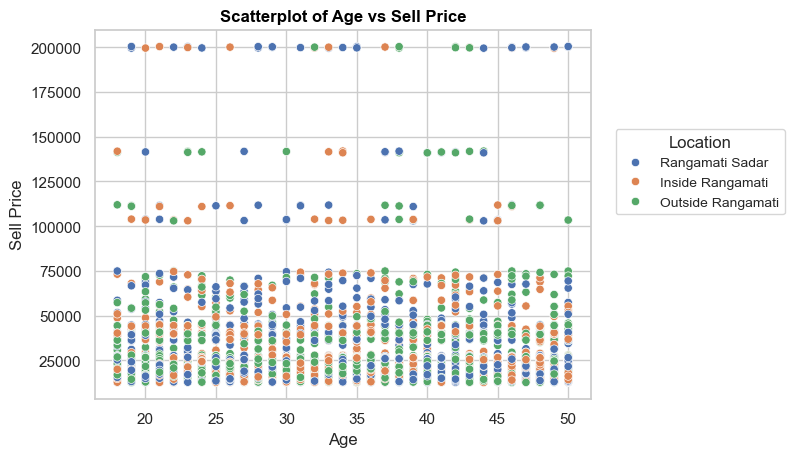

In [17]:
sns.scatterplot(data=dataset, x='Age', y='SellPrice', hue='Location')
plt.title('Scatterplot of Age vs Sell Price', {'fontweight':'bold', 'c': 'black'})
plt.xlabel('Age')
plt.ylabel('Sell Price')
plt.legend(title='Location', loc=(1.05, 0.5), fontsize='small', title_fontsize='medium')
plt.show()

There is no clear distinct pattern in the price of the mobile device and the age demographic of the buyers.

### Summarizing the Monthly Sales Data

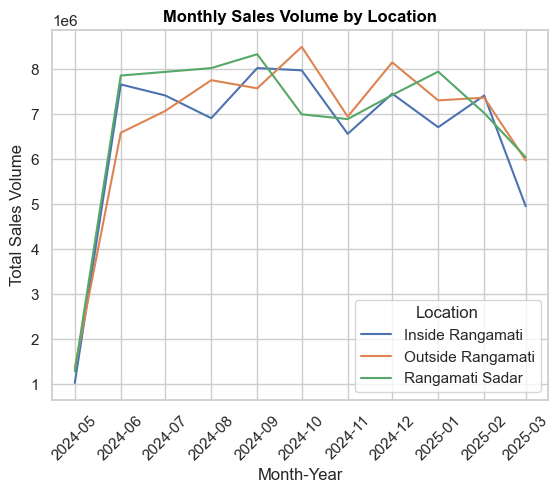

In [18]:
dataset['Month_Year'] = dataset['Date'].dt.to_period('M')
sales_by_month = dataset.groupby(['Month_Year', 'Location']).agg({'SellPrice': 'sum'}).reset_index()
sales_by_month['Month_Year'] = sales_by_month['Month_Year'].dt.to_timestamp()  # Convert to timestamp for plotting
sns.lineplot(data=sales_by_month, x='Month_Year', y='SellPrice', hue='Location')
plt.xlabel('Month-Year')
plt.title('Monthly Sales Volume by Location', {'fontweight':'bold', 'c': 'black'})
plt.xticks(rotation=45)
plt.ylabel('Total Sales Volume')
plt.show()


In [19]:
print(min(dataset['Date']))
print(max(dataset['Date']))

2024-05-27 00:00:00
2025-03-22 00:00:00


In [20]:
print(dataset.Location.unique())

['Rangamati Sadar' 'Inside Rangamati' 'Outside Rangamati']


In [21]:
# determine the region of each transactions
dataset['Region'] = dataset['Location'].apply(lambda x: 'Local' if x in ['Rangamati Sadar' ,'Inside Rangamati'] else 'Outside' )
dataset.head()

,Date,Location,Age,Gender,MobileName,SellPrice,FromFacebook,FollowedPage,BoughtBefore,HeardShopBefore,Month_Year,Region
0,2024-05-27,Rangamati Sadar,49,F,Galaxy A55 5G 8/128,17073.0,No,Yes,No,Yes,2024-05,Local
1,2024-05-27,Inside Rangamati,44,M,Redmi Note 12 Pro 8/128,15546.0,Yes,No,No,Yes,2024-05,Local
2,2024-05-27,Rangamati Sadar,45,M,R-70 Turbo 5G 6/128,26516.0,Yes,No,No,Yes,2024-05,Local
3,2024-05-27,Rangamati Sadar,46,M,R-70 Turbo 5G 6/128,21927.0,No,No,No,Yes,2024-05,Local
4,2024-05-27,Outside Rangamati,27,F,Vivo T3x 5G 8/128,16718.0,Yes,No,No,Yes,2024-05,Outside


In [22]:
sales_by_month

,Month_Year,Location,SellPrice
0,2024-05-01,Inside Rangamati,1032131.0
1,2024-05-01,Outside Rangamati,1359721.0
2,2024-05-01,Rangamati Sadar,1286057.0
3,2024-06-01,Inside Rangamati,7657318.0
4,2024-06-01,Outside Rangamati,6584889.0
5,2024-06-01,Rangamati Sadar,7855022.0
6,2024-07-01,Inside Rangamati,7412785.0
7,2024-07-01,Outside Rangamati,7069358.0
8,2024-07-01,Rangamati Sadar,7936024.0
9,2024-08-01,Inside Rangamati,6908576.0


# Preprocessing data and Encoding Variables

Preprocessing steps to Encode categorical variables

In [23]:
# encode labeled data, this is necessary for categorical features
# individual encoders are used to perform inverse transform later
from sklearn.preprocessing import LabelEncoder

modeldata = dataset.copy()

categorical_features = ['Location', 'MobileName', 'FromFacebook', 'Gender' , 'FollowedPage', 'BoughtBefore', 'HeardShopBefore']
numerical_features = ['SellPrice', 'Age']
# Target variable to be understood from the Group discussion

le_MobileName= LabelEncoder()
modeldata['MobileName'] = le_MobileName.fit_transform(modeldata['MobileName']) # encode the MobileName column

le_FromFacebook= LabelEncoder()
modeldata['FromFacebook'] = le_FromFacebook.fit_transform(modeldata['FromFacebook']) # encode the FromFacebook column

le_Gender= LabelEncoder()
modeldata['Gender'] = le_Gender.fit_transform(modeldata['Gender'])

le_FollowedPage= LabelEncoder()
modeldata['FollowedPage'] = le_FollowedPage.fit_transform(modeldata['FollowedPage']) # encode the Follow Page column

le_BoughtBefore= LabelEncoder()
modeldata['BoughtBefore'] = le_BoughtBefore.fit_transform(modeldata['BoughtBefore']) # encode the Bought Before column

le_BoughtBefore= LabelEncoder()
modeldata['HeardShopBefore'] = le_BoughtBefore.fit_transform(modeldata['HeardShopBefore']) # encode the Heard Shop Before column

dataset.head()



,Date,Location,Age,Gender,MobileName,SellPrice,FromFacebook,FollowedPage,BoughtBefore,HeardShopBefore,Month_Year,Region
0,2024-05-27,Rangamati Sadar,49,F,Galaxy A55 5G 8/128,17073.0,No,Yes,No,Yes,2024-05,Local
1,2024-05-27,Inside Rangamati,44,M,Redmi Note 12 Pro 8/128,15546.0,Yes,No,No,Yes,2024-05,Local
2,2024-05-27,Rangamati Sadar,45,M,R-70 Turbo 5G 6/128,26516.0,Yes,No,No,Yes,2024-05,Local
3,2024-05-27,Rangamati Sadar,46,M,R-70 Turbo 5G 6/128,21927.0,No,No,No,Yes,2024-05,Local
4,2024-05-27,Outside Rangamati,27,F,Vivo T3x 5G 8/128,16718.0,Yes,No,No,Yes,2024-05,Outside


In [24]:
list_mobile_names = dataset.MobileName.unique() # check the unique values of the MobileName column
print(len(list_mobile_names)) # check the number of unique values of the MobileName column

17


In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers =[('ct_location', OneHotEncoder(), ['Location'])], remainder='passthrough')
datasetworking = ct.fit_transform(dataset).copy()

In [26]:
dataset

,Date,Location,Age,Gender,MobileName,SellPrice,FromFacebook,FollowedPage,BoughtBefore,HeardShopBefore,Month_Year,Region
0,2024-05-27,Rangamati Sadar,49,F,Galaxy A55 5G 8/128,17073.0,No,Yes,No,Yes,2024-05,Local
1,2024-05-27,Inside Rangamati,44,M,Redmi Note 12 Pro 8/128,15546.0,Yes,No,No,Yes,2024-05,Local
2,2024-05-27,Rangamati Sadar,45,M,R-70 Turbo 5G 6/128,26516.0,Yes,No,No,Yes,2024-05,Local
3,2024-05-27,Rangamati Sadar,46,M,R-70 Turbo 5G 6/128,21927.0,No,No,No,Yes,2024-05,Local
4,2024-05-27,Outside Rangamati,27,F,Vivo T3x 5G 8/128,16718.0,Yes,No,No,Yes,2024-05,Outside
...,...,...,...,...,...,...,...,...,...,...,...,...
8866,2025-03-22,Outside Rangamati,34,M,iQOO Neo 9 Pro 5G 12/256,21682.0,Yes,Yes,Yes,Yes,2025-03,Outside
8867,2025-03-22,Inside Rangamati,48,M,Moto G85 5G 8/128,26493.0,No,No,No,No,2025-03,Local
8868,2025-03-22,Inside Rangamati,30,F,Galaxy M35 5G 8/128,16184.0,No,No,No,No,2025-03,Local
8869,2025-03-22,Inside Rangamati,22,F,Galaxy A55 5G 8/128,16663.0,Yes,No,No,Yes,2025-03,Local


In [29]:
numeric = modeldata.select_dtypes(include=['int64', 'int32', 'float64']).columns.to_list()

<Axes: >

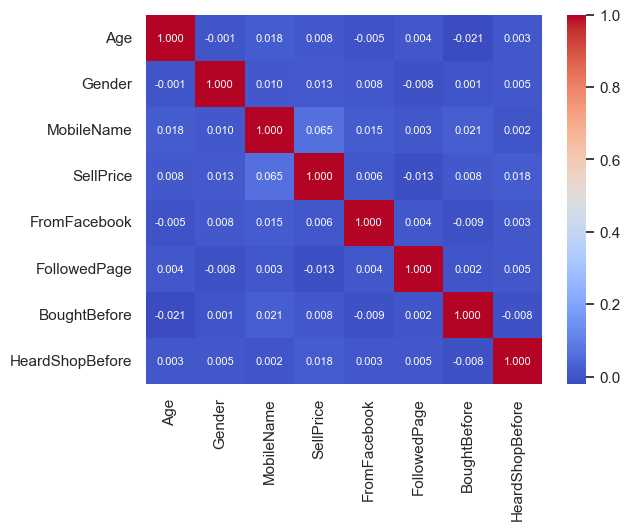

In [34]:
corr_matrix = modeldata[numeric].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.3f', annot_kws={'size':8})